##Problem 1

In [3]:
#import necessary libraries here
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import recall_score, precision_score, f1_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
iris = load_iris()
iris.DESCR


'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [7]:
X = iris.drop(['target'], axis=1)
y = iris['target']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)

In [10]:

recall_micro_list = []
recall_macro_list = []
recall_weighted_list = []
precision_micro_list = []
precision_macro_list = []
precision_weighted_list = []
f1_micro_list = []
f1_macro_list = []
f1_weighted_list = []
depths = range(1, 6)

In [11]:
#Traverse different depths
for depth in depths:
    # create Classifier
    dtree = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=depth, random_state=42).fit(X_train, y_train)
    # predict
    y_pred = dtree.predict(X_test)
    
    #Recall： The proportion of samples that are actually positive cases that are correctly predicted as positive cases.
    #Tp/(TP+FN)
    # Calculate recall rates using different averaging methods
    recall_micro = recall_score(y_test, y_pred, average='micro')#Separate for each category
    recall_macro = recall_score(y_test, y_pred, average='macro')#Based on total sum calculation
    recall_weighted = recall_score(y_test, y_pred, average='weighted')#Weighted average the results based on the sample size of each category.
    recall_micro_list.append(recall_micro)
    recall_macro_list.append(recall_macro)
    recall_weighted_list.append(recall_weighted)
    
    #Precision: The probability of the model predicting the correctness of positive examples in the sample.
    #TP/(TP+FP)
    # Calculate the accuracy of different averaging methods
    precision_micro = precision_score(y_test, y_pred, average='micro')
    precision_macro = precision_score(y_test, y_pred, average='macro')
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    precision_micro_list.append(precision_micro)
    precision_macro_list.append(precision_macro)
    precision_weighted_list.append(precision_weighted)
    
    
    #2*Precision*Recall/(Precision+Recall)
    # Calculate F1 scores using different averaging methods
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_micro_list.append(f1_micro)
    f1_macro_list.append(f1_macro)
    f1_weighted_list.append(f1_weighted)

# Identify the depth value that leads to the highest recall rate
max_recall_micro_depth = depths[np.argmax(recall_micro_list)]
max_recall_macro_depth = depths[np.argmax(recall_macro_list)]
max_recall_weighted_depth = depths[np.argmax(recall_weighted_list)]

# Find the depth value that causes the lowest accuracy
min_precision_micro_depth = depths[np.argmin(precision_micro_list)]
min_precision_macro_depth = depths[np.argmin(precision_macro_list)]
min_precision_weighted_depth = depths[np.argmin(precision_weighted_list)]

# Find the depth value that leads to the best F1 score
max_f1_micro_depth = depths[np.argmax(f1_micro_list)]
max_f1_macro_depth = depths[np.argmax(f1_macro_list)]
max_f1_weighted_depth = depths[np.argmax(f1_weighted_list)]



print(f"The depth value that results in the highest recall under Micro averaging: {max_recall_micro_depth}")
#same result  use the micro, macro, and weighted  methods of score calculation
print(f"The depth value that results in the highest recall under Macro averaging: {max_recall_macro_depth}")
print(f"The depth value that results in the highest recall under Weighted averaging: {max_recall_weighted_depth}")

print(f"The depth value that results in the lowest precision under Micro averaging: {min_precision_micro_depth}")
print(f"The depth value that results in the lowest precision under Macro averaging: {min_precision_macro_depth}")
print(f"The depth value that results in the lowest precision under Weighted averaging: {min_precision_weighted_depth}")

print(f"The depth value that results in the best F1 score under Micro averaging: {max_f1_micro_depth}")
print(f"The depth value that results in the best F1 score under Macro averaging: {max_f1_macro_depth}")
print(f"The depth value that results in the best F1 score under Weighted averaging: {max_f1_weighted_depth}")


The depth value that results in the highest recall under Micro averaging: 3
The depth value that results in the highest recall under Macro averaging: 3
The depth value that results in the highest recall under Weighted averaging: 3
The depth value that results in the lowest precision under Micro averaging: 1
The depth value that results in the lowest precision under Macro averaging: 1
The depth value that results in the lowest precision under Weighted averaging: 1
The depth value that results in the best F1 score under Micro averaging: 3
The depth value that results in the best F1 score under Macro averaging: 3
The depth value that results in the best F1 score under Weighted averaging: 3


D:\Anaconda\envs\new_env1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\new_env1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:

print(f"The depth value that results in the highest recall : {max_recall_micro_depth}")
print(f"The depth value that results in the lowest precision : {min_precision_micro_depth}")
print(f"The depth value that results in the best F1 score : {max_f1_micro_depth}")

The depth value that results in the highest recall : 3
The depth value that results in the lowest precision : 1
The depth value that results in the best F1 score : 3


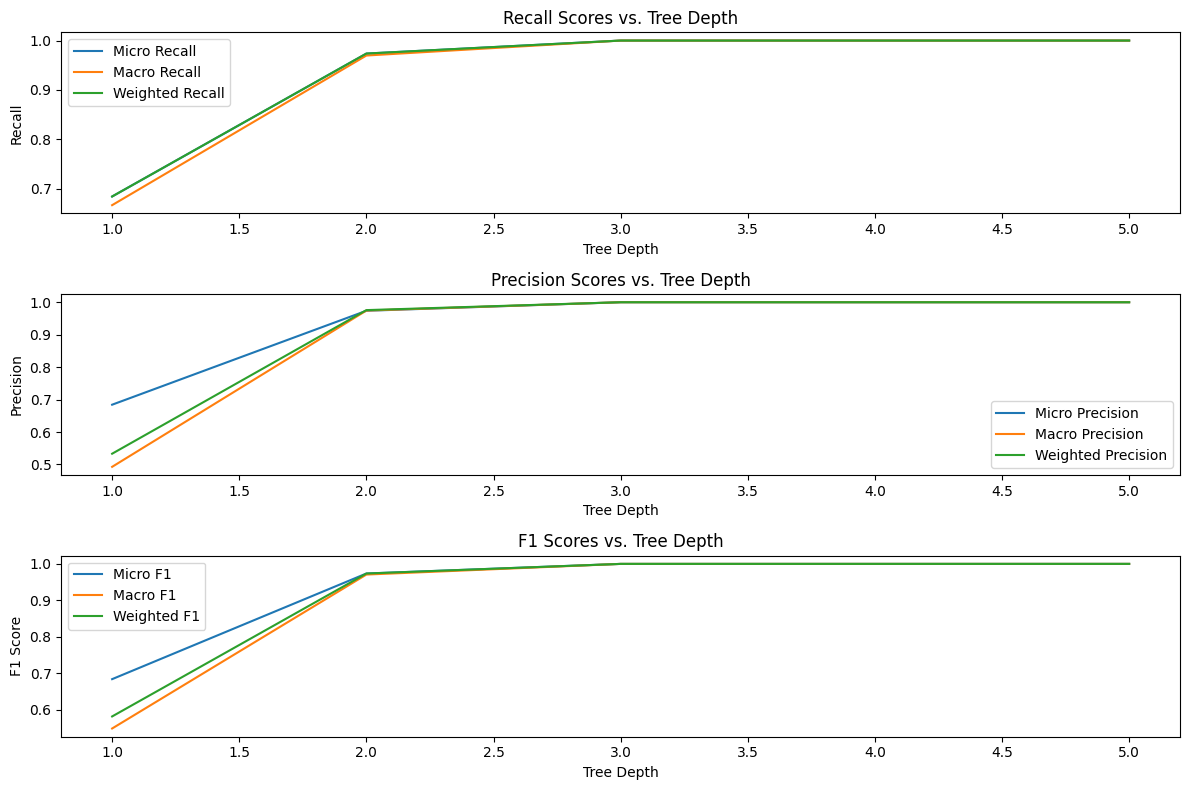

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(depths, recall_micro_list, label='Micro Recall')
plt.plot(depths, recall_macro_list, label='Macro Recall')
plt.plot(depths, recall_weighted_list, label='Weighted Recall')
plt.title('Recall Scores vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Recall')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(depths, precision_micro_list, label='Micro Precision')
plt.plot(depths, precision_macro_list, label='Macro Precision')
plt.plot(depths, precision_weighted_list, label='Weighted Precision')
plt.title('Precision Scores vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Precision')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(depths, f1_micro_list, label='Micro F1')
plt.plot(depths, f1_macro_list, label='Macro F1')
plt.plot(depths, f1_weighted_list, label='Weighted F1')
plt.title('F1 Scores vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

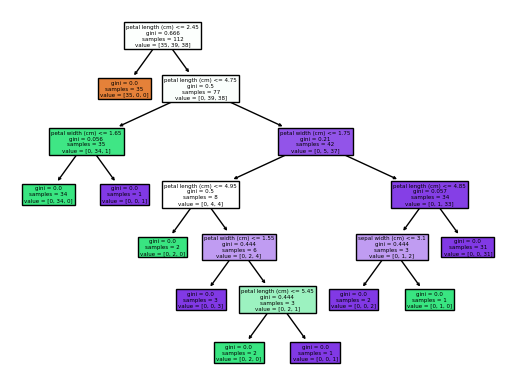

In [14]:
from sklearn.tree import plot_tree
plot_tree(DecisionTreeClassifier(random_state=42).fit(X_train, y_train), filled = True, feature_names=X.columns);

##Problem 2

In [7]:

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['Sample Code Number', 'Clump Thickness', 'Uniformity of Cell Size', 
                'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 
                'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


In [8]:
df = pd.read_csv(url, names=column_names, na_values='?')
df = df.dropna() 


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample Code Number           683 non-null    int64  
 1   Clump Thickness              683 non-null    int64  
 2   Uniformity of Cell Size      683 non-null    int64  
 3   Uniformity of Cell Shape     683 non-null    int64  
 4   Marginal Adhesion            683 non-null    int64  
 5   Single Epithelial Cell Size  683 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              683 non-null    int64  
 8   Normal Nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


In [10]:

dtc = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=2, random_state=42).fit(X, y)
tree_structure = dtc.tree_
first_split_feature = tree_structure.feature[0]  
first_split_value = tree_structure.threshold[0] 
feature_name = X.columns[first_split_feature]



def calculate_metrics(y_left, y_right, parent_entropy):
    def entropy(y):
        counts = np.bincount(y)#Count the number of times each non negative integer appears in y
        probs = counts / len(y)
        return -np.sum(probs * np.log2(probs + 1e-10))#avoid log(0)


    def gini(y):
        counts = np.bincount(y)
        probs = counts / len(y)
        return 1 - np.sum(probs ** 2)


    def misclassification_error(y):
        counts = np.bincount(y)
        return 1 - np.max(counts / len(y))

    #The weights of the left and right subsets are calculated based on the number of samples in each subset
    w_left, w_right = len(y_left) / (len(y_left) + len(y_right)), len(y_right) / (len(y_left) + len(y_right))
    entropy_left, entropy_right = entropy(y_left), entropy(y_right)
    gini_left, gini_right = gini(y_left), gini(y_right)
    error_left, error_right = misclassification_error(y_left), misclassification_error(y_right)

    # Calculate the split weighted entropy, weighted Gini impurity, and weighted misclassification rate based on the weights of the left and right subsets and their respective metrics.
    entropy_split = w_left * entropy_left + w_right * entropy_right
    gini_split = w_left * gini_left + w_right * gini_right
    error_split = w_left * error_left + w_right * error_right


    information_gain = parent_entropy - entropy_split

    return entropy_split, gini_split, error_split, information_gain


parent_entropy = -np.sum([(np.sum(y == c) / len(y)) * np.log2(np.sum(y == c) / len(y)) for c in np.unique(y)])


left_indices = X.iloc[:, first_split_feature] <= first_split_value
right_indices = ~left_indices
y_left, y_right = y[left_indices], y[right_indices]

entropy_split, gini_split, error_split, information_gain = calculate_metrics(y_left, y_right, parent_entropy)

# 6. 输出结果
print(f"feature is selected for the first split: {feature_name}")
print(f"the decision boundary: {first_split_value:.4f}")
print(f"Gini: {gini_split:.4f}")
print(f"Entropy: {entropy_split:.4f}")
print(f"Misclassification Error: {error_split:.4f}")
print(f"Information Gain: {information_gain:.4f}")

feature is selected for the first split: Uniformity of Cell Size
the decision boundary: 2.5000
Gini: 0.1294
Entropy: 0.3451
Misclassification Error: 0.0732
Information Gain: 0.5889


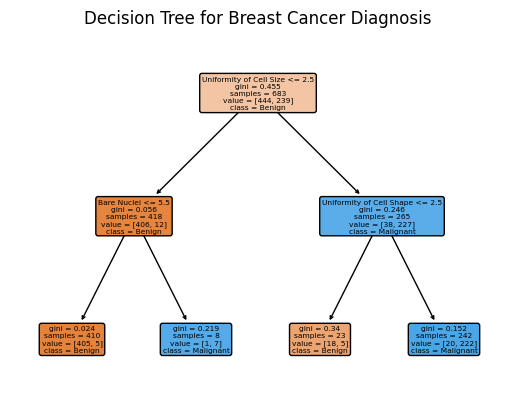

In [46]:
#binarytree
dtc = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=2, random_state=42).fit(X, y)

plot_tree(dtc,
          feature_names=X.columns,
          class_names=['Benign', 'Malignant'],
          filled=True,
          rounded=True)
plt.title('Decision Tree for Breast Cancer Diagnosis')
plt.show()

Problem 3

In [2]:
#Data Inheritance Problem 2

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
# 加载数据
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, names=column_names)

# 分离特征和标签
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0})

# 划分训练集和测试集test_size=0.3  
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

# 定义决策树分类器参数
dtc_params = {
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'max_depth': 2,
    'random_state': 42
}

# 不进行PCA，使用原始连续数据训练模型
dtc_original = DecisionTreeClassifier(**dtc_params)
dtc_original.fit(X_train, y_train)
y_pred_original = dtc_original.predict(X_test)

# 计算原始数据的评估指标
f1_original = f1_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)
#PCA使用前需要进行标准化！！
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 进行PCA

# 使用第一个主成分
pca_1 = PCA(n_components=1)
X_train_pca_1 = pca_1.fit_transform(X_train)
X_test_pca_1 = pca_1.transform(X_test)

dtc_pca_1 = DecisionTreeClassifier(**dtc_params)
dtc_pca_1.fit(X_train_pca_1, y_train)
y_pred_pca_1 = dtc_pca_1.predict(X_test_pca_1)

f1_pca_1 = f1_score(y_test, y_pred_pca_1)
precision_pca_1 = precision_score(y_test, y_pred_pca_1)
recall_pca_1 = recall_score(y_test, y_pred_pca_1)

# 使用前两个主成分
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)

dtc_pca_2 = DecisionTreeClassifier(**dtc_params)
dtc_pca_2.fit(X_train_pca_2, y_train)
y_pred_pca_2 = dtc_pca_2.predict(X_test_pca_2)

f1_pca_2 = f1_score(y_test, y_pred_pca_2)
precision_pca_2 = precision_score(y_test, y_pred_pca_2)
recall_pca_2 = recall_score(y_test, y_pred_pca_2)

# 混淆矩阵
cm_original = confusion_matrix(y_test, y_pred_original)
cm_pca_1 = confusion_matrix(y_test, y_pred_pca_1)
cm_pca_2 = confusion_matrix(y_test, y_pred_pca_2)

# 计算TP, FP, TPR, FPR
def calculate_rates(cm):
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tp, fp, tpr, fpr

tp_original, fp_original, tpr_original, fpr_original = calculate_rates(cm_original)
tp_pca_1, fp_pca_1, tpr_pca_1, fpr_pca_1 = calculate_rates(cm_pca_1)
tp_pca_2, fp_pca_2, tpr_pca_2, fpr_pca_2 = calculate_rates(cm_pca_2)

# 整理结果
results = {
    "Original Data": {
        "F1 Score": f1_original,
        "Precision": precision_original,
        "Recall": recall_original,
        "TP": tp_original,
        "FP": fp_original,
        "TPR": tpr_original,
        "FPR": fpr_original
    },
    "Using 1st Principal Component": {
        "F1 Score": f1_pca_1,
        "Precision": precision_pca_1,
        "Recall": recall_pca_1,
        "TP": tp_pca_1,
        "FP": fp_pca_1,
        "TPR": tpr_pca_1,
        "FPR": fpr_pca_1
    },
    "Using 1st and 2nd Principal Components": {
        "F1 Score": f1_pca_2,
        "Precision": precision_pca_2,
        "Recall": recall_pca_2,
        "TP": tp_pca_2,
        "FP": fp_pca_2,
        "TPR": tpr_pca_2,
        "FPR": fpr_pca_2
    }
}

# 输出结果
for data_type, metrics in results.items():
    print(f"\n{data_type}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# 判断使用连续数据是否有益，综合F1分数、精确率和召回率判断
original_score = f1_original + precision_original + recall_original
pca_1_score = f1_pca_1 + precision_pca_1 + recall_pca_1
pca_2_score = f1_pca_2 + precision_pca_2 + recall_pca_2

if original_score > max(pca_1_score, pca_2_score):
    print("\nUsing continuous data is beneficial as it has a higher combined score of F1, Precision, and Recall.")
else:
    print("\nUsing PCA-transformed data might be beneficial as it has a higher combined score of F1, Precision, and Recall.")
    


Original Data:
F1 Score: 0.8889
Precision: 0.8889
Recall: 0.8889
TP: 48.0000
FP: 6.0000
TPR: 0.8889
FPR: 0.0674

Using 1st Principal Component:
F1 Score: 0.9286
Precision: 0.8966
Recall: 0.9630
TP: 52.0000
FP: 6.0000
TPR: 0.9630
FPR: 0.0674

Using 1st and 2nd Principal Components:
F1 Score: 0.9286
Precision: 0.8966
Recall: 0.9630
TP: 52.0000
FP: 6.0000
TPR: 0.9630
FPR: 0.0674

Using PCA-transformed data might be beneficial as it has a higher combined score of F1, Precision, and Recall.


In [2]:
# 以矩阵形式输出混淆矩阵
print("\nConfusion Matrices:")
print("Original Data:")
print(cm_original)
print("Using 1st Principal Component:")
print(cm_pca_1)
print("Using 1st and 2nd Principal Components:")
print(cm_pca_2)
    


Confusion Matrices:
Original Data:
[[83  6]
 [ 6 48]]
Using 1st Principal Component:
[[83  6]
 [ 2 52]]
Using 1st and 2nd Principal Components:
[[83  6]
 [ 2 52]]
